# 🖼️ Actividad Guiada: Clasificación de Imágenes con MobileNet

**Objetivo:** Aprender a usar modelos preentrenados para clasificar imágenes usando TensorFlow y Keras.

**Modelo:** MobileNetV2 - Una red neuronal convolucional ligera y eficiente.

**Dataset de entrenamiento:** ImageNet (1000 categorías)

---

## 📚 Parte 1: Instalación y Configuración

In [11]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

print(f"TensorFlow versión: {tf.__version__}")
print(f"GPU disponible: {tf.config.list_physical_devices('GPU')}")

TensorFlow versión: 2.19.0
GPU disponible: []


## 🧠 Parte 2: Cargar el Modelo Preentrenado

MobileNetV2 es una arquitectura eficiente diseñada para dispositivos móviles.
Está preentrenada con ImageNet (14 millones de imágenes, 1000 categorías).

In [12]:
print("🔄 Cargando modelo MobileNetV2...")
model = MobileNetV2(weights='imagenet', include_top=True)
print("✅ Modelo cargado exitosamente!")

# Mostrar resumen del modelo
print("\n📊 Arquitectura del modelo:")
model.summary()

🔄 Cargando modelo MobileNetV2...
✅ Modelo cargado exitosamente!

📊 Arquitectura del modelo:


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

## 🖼️ Parte 3: Funciones Auxiliares

Creamos funciones para:
1. Cargar imágenes desde URL o archivo local
2. Preprocesar imágenes para el modelo
3. Visualizar resultados

In [13]:
def cargar_imagen_desde_url(url):
    """Carga una imagen desde una URL"""
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        print(f"❌ Error al cargar imagen: {e}")
        return None

def preprocesar_imagen(img, target_size=(224, 224)):
    """
    Preprocesa la imagen para MobileNetV2
    - Redimensiona a 224x224
    - Convierte a array numpy
    - Aplica preprocesamiento específico de MobileNet
    """
    # Redimensionar
    img = img.resize(target_size)

    # Convertir a array numpy
    img_array = image.img_to_array(img)

    # Expandir dimensiones (batch size)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocesamiento específico de MobileNet
    img_array = preprocess_input(img_array)

    return img_array

def clasificar_y_mostrar(img, predicciones, top_k=5):
    """
    Muestra la imagen y las predicciones del modelo
    """
    # Decodificar predicciones
    resultados = decode_predictions(predicciones, top=top_k)[0]

    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Mostrar imagen
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title('Imagen Original', fontsize=14, fontweight='bold')

    # Mostrar predicciones
    clases = [resultado[1] for resultado in resultados]
    probabilidades = [resultado[2] * 100 for resultado in resultados]

    # Crear gráfico de barras
    colores = plt.cm.viridis(np.linspace(0.3, 0.9, top_k))
    bars = ax2.barh(clases, probabilidades, color=colores)
    ax2.set_xlabel('Probabilidad (%)', fontsize=12)
    ax2.set_title(f'Top {top_k} Predicciones', fontsize=14, fontweight='bold')
    ax2.invert_yaxis()

    # Añadir valores en las barras
    for i, (bar, prob) in enumerate(zip(bars, probabilidades)):
        ax2.text(prob + 1, i, f'{prob:.2f}%', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Mostrar resultados en texto
    print("\n" + "="*60)
    print("🎯 RESULTADOS DE CLASIFICACIÓN")
    print("="*60)
    for i, (id_clase, nombre, probabilidad) in enumerate(resultados, 1):
        print(f"{i}. {nombre.replace('_', ' ').title()}: {probabilidad*100:.2f}%")
    print("="*60 + "\n")

## 🚀 Parte 4: Ejemplos de Clasificación

Vamos a clasificar diferentes tipos de imágenes.

🐕 Ejemplo 1: Clasificando un Golden Retriever


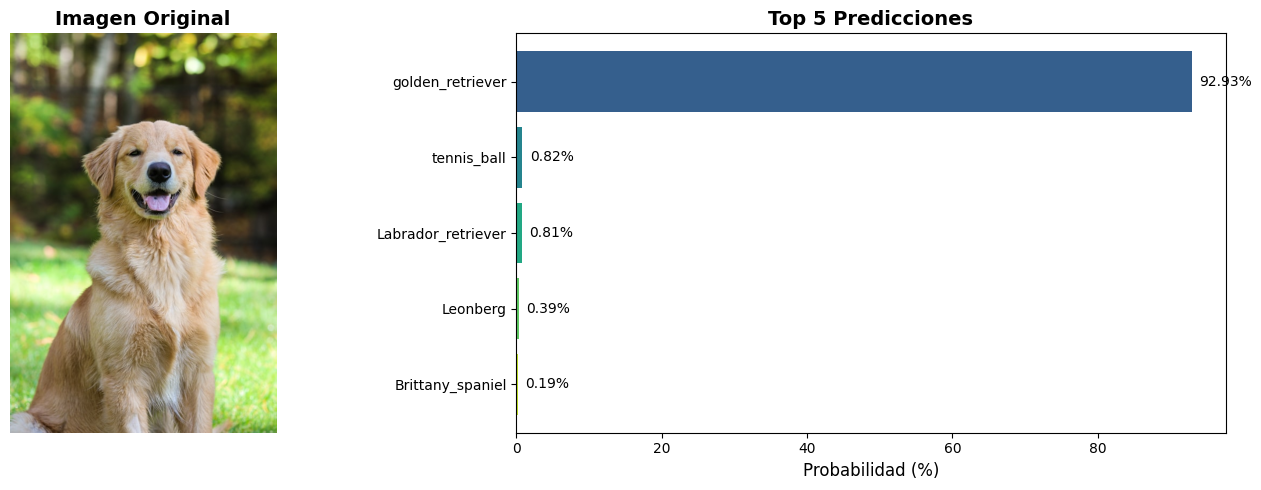


🎯 RESULTADOS DE CLASIFICACIÓN
1. Golden Retriever: 92.93%
2. Tennis Ball: 0.82%
3. Labrador Retriever: 0.81%
4. Leonberg: 0.39%
5. Brittany Spaniel: 0.19%



In [14]:
print("🐕 Ejemplo 1: Clasificando un Golden Retriever")
url_perro = "https://images.unsplash.com/photo-1633722715463-d30f4f325e24?w=500"

img_perro = cargar_imagen_desde_url(url_perro)
if img_perro:
    img_procesada = preprocesar_imagen(img_perro)
    predicciones = model.predict(img_procesada, verbose=0)
    clasificar_y_mostrar(img_perro, predicciones)

### 📝 Ejercicio 1: Prueba con tus propias imágenes

Cambia la URL por una imagen de tu elección y ejecuta el código.

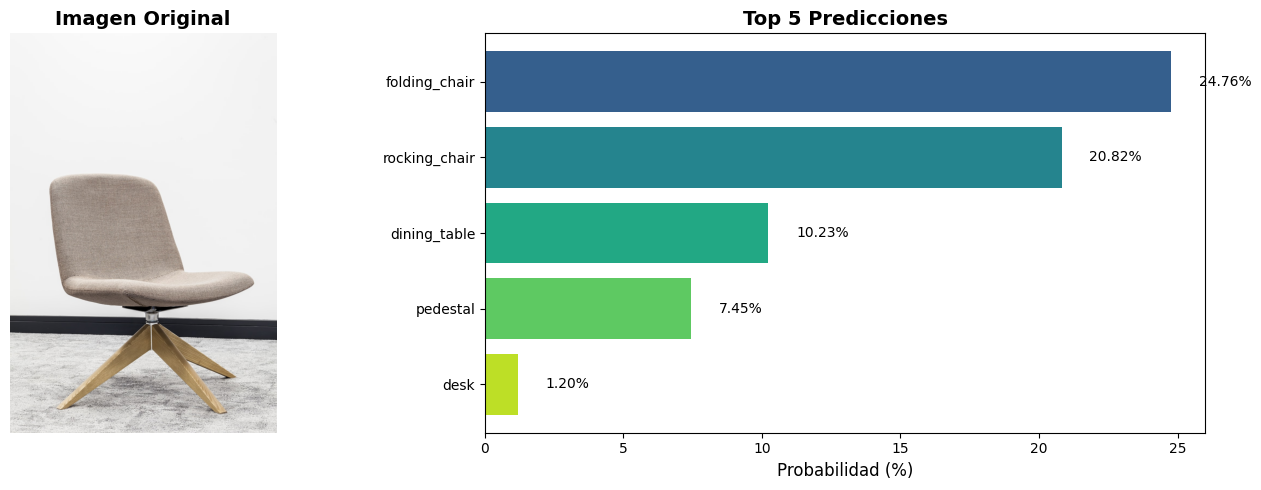


🎯 RESULTADOS DE CLASIFICACIÓN
1. Folding Chair: 24.76%
2. Rocking Chair: 20.82%
3. Dining Table: 10.23%
4. Pedestal: 7.45%
5. Desk: 1.20%



In [15]:
#  AQUI: Cambia esta URL por otra imagen
url_personalizada = "https://images.unsplash.com/photo-1580480055273-228ff5388ef8?q=80&w=987&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"  # Gato

img_custom = cargar_imagen_desde_url(url_personalizada)
if img_custom:
    img_procesada = preprocesar_imagen(img_custom)
    predicciones = model.predict(img_procesada, verbose=0)
    clasificar_y_mostrar(img_custom, predicciones)

## 🎨 Parte 5: Clasificación Múltiple

Clasifiquemos varias imágenes a la vez para comparar.

🔄 Clasificando múltiples imágenes...


📸 Procesando: Elefante


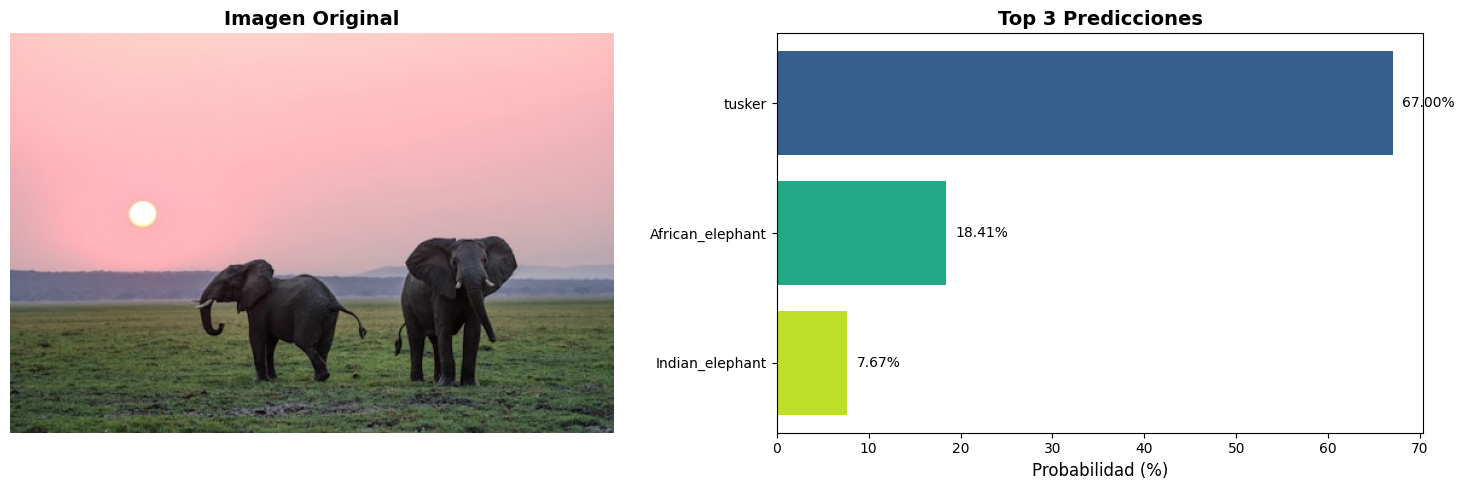


🎯 RESULTADOS DE CLASIFICACIÓN
1. Tusker: 67.00%
2. African Elephant: 18.41%
3. Indian Elephant: 7.67%


📸 Procesando: Automóvil


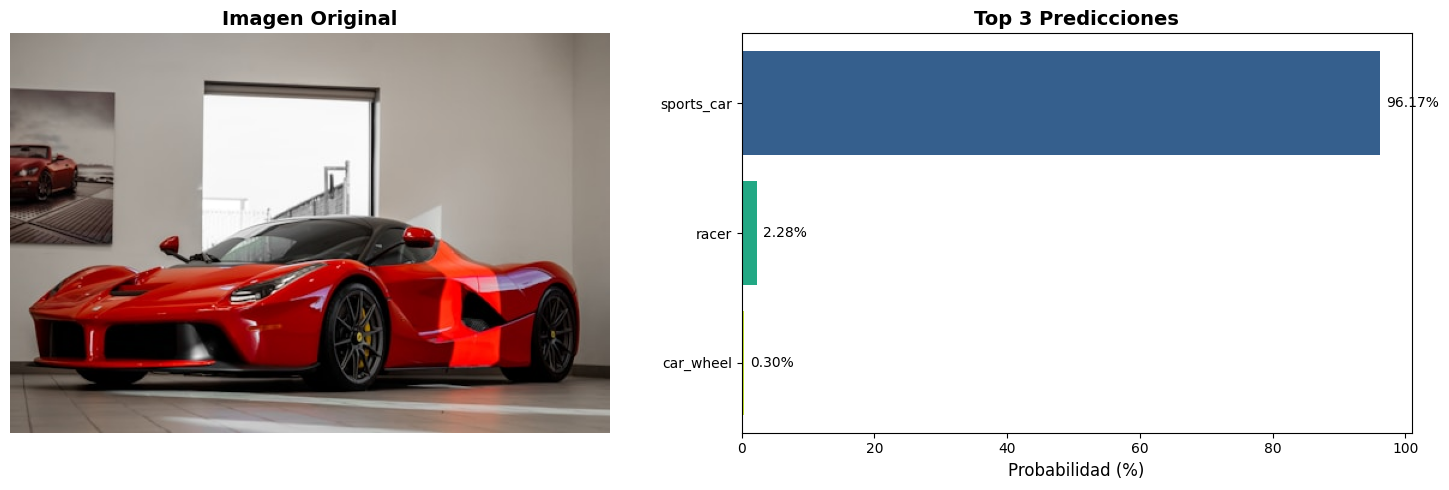


🎯 RESULTADOS DE CLASIFICACIÓN
1. Sports Car: 96.17%
2. Racer: 2.28%
3. Car Wheel: 0.30%


📸 Procesando: Pizza


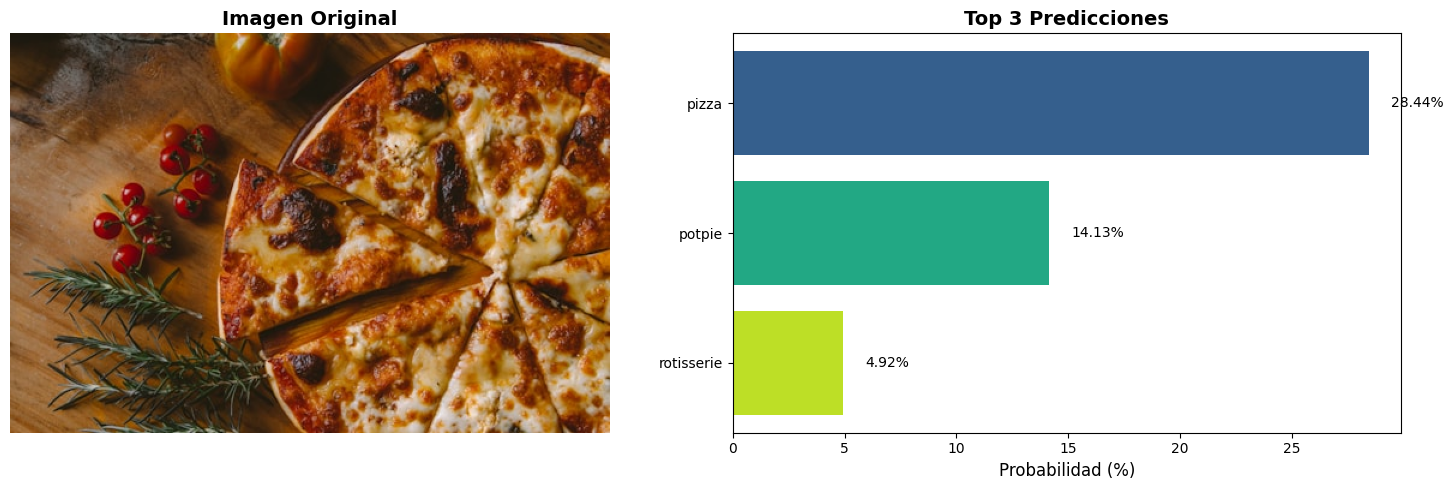


🎯 RESULTADOS DE CLASIFICACIÓN
1. Pizza: 28.44%
2. Potpie: 14.13%
3. Rotisserie: 4.92%


📸 Procesando: Avión


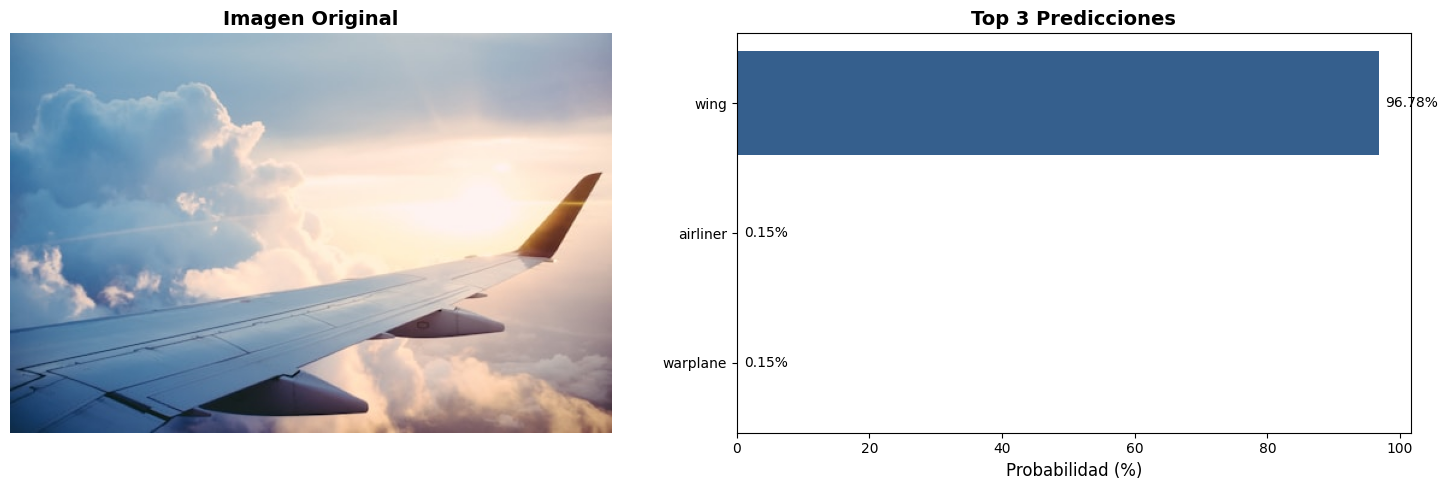


🎯 RESULTADOS DE CLASIFICACIÓN
1. Wing: 96.78%
2. Airliner: 0.15%
3. Warplane: 0.15%



In [16]:
urls_ejemplo = {
    "Elefante": "https://images.unsplash.com/photo-1564760055775-d63b17a55c44?w=500",
    "Automóvil": "https://images.unsplash.com/photo-1583121274602-3e2820c69888?w=500",
    "Pizza": "https://images.unsplash.com/photo-1513104890138-7c749659a591?w=500",
    "Avión": "https://images.unsplash.com/photo-1436491865332-7a61a109cc05?w=500"
}

print("🔄 Clasificando múltiples imágenes...\n")

for nombre, url in urls_ejemplo.items():
    print(f"\n{'='*60}")
    print(f"📸 Procesando: {nombre}")
    print(f"{'='*60}")

    img = cargar_imagen_desde_url(url)
    if img:
        img_procesada = preprocesar_imagen(img)
        predicciones = model.predict(img_procesada, verbose=0)
        clasificar_y_mostrar(img, predicciones, top_k=3)

## 📊 Parte 6: Análisis de Confianza

Exploremos cómo el modelo maneja diferentes niveles de confianza.


🔍 Analizando confianza de la última predicción...


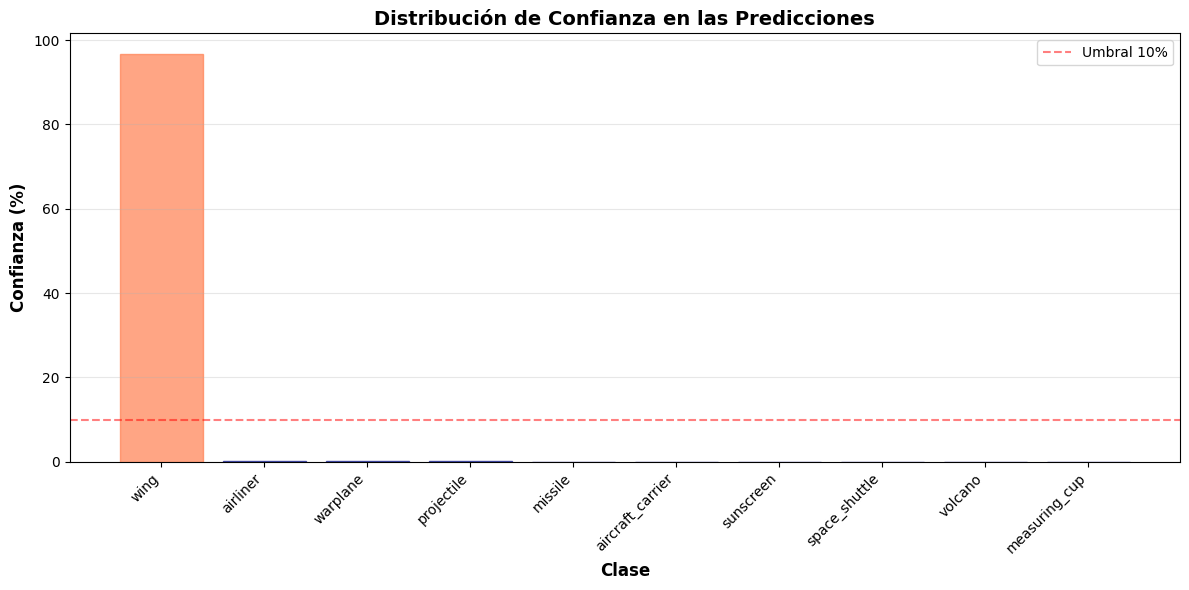


📈 Métricas de confianza:
  • Confianza máxima: 96.78%
  • Suma Top-5: 97.24%
  • Nivel de certeza: Alto


In [17]:
def analizar_confianza(predicciones):
    """Analiza la distribución de confianza en las predicciones"""
    resultados = decode_predictions(predicciones, top=10)[0]

    fig, ax = plt.subplots(figsize=(12, 6))

    clases = [f"{r[1][:20]}" for r in resultados]
    probs = [r[2] * 100 for r in resultados]

    bars = ax.bar(range(len(clases)), probs, color='skyblue', edgecolor='navy', alpha=0.7)
    bars[0].set_color('coral')

    ax.set_xlabel('Clase', fontsize=12, fontweight='bold')
    ax.set_ylabel('Confianza (%)', fontsize=12, fontweight='bold')
    ax.set_title('Distribución de Confianza en las Predicciones', fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(clases)))
    ax.set_xticklabels(clases, rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)

    # Línea de referencia
    ax.axhline(y=10, color='r', linestyle='--', alpha=0.5, label='Umbral 10%')
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Calcular métricas
    max_conf = probs[0]
    suma_top5 = sum(probs[:5])

    print(f"\n📈 Métricas de confianza:")
    print(f"  • Confianza máxima: {max_conf:.2f}%")
    print(f"  • Suma Top-5: {suma_top5:.2f}%")
    print(f"  • Nivel de certeza: {'Alto' if max_conf > 50 else 'Medio' if max_conf > 20 else 'Bajo'}")

# Analizar última predicción
print("\n🔍 Analizando confianza de la última predicción...")
analizar_confianza(predicciones)

## 📚 Parte 7: Información Adicional

In [18]:
print("📋 Ejemplo de categorías que puede clasificar MobileNetV2:\n")
categorias_ejemplo = [
    "Animales: golden_retriever, tiger, elephant, zebra",
    "Vehículos: convertible, sports_car, ambulance, airliner",
    "Objetos: laptop, coffee_mug, wine_bottle, basketball",
    "Comida: pizza, ice_cream, hamburger, espresso",
    "Naturaleza: coral_reef, volcano, valley, seashore"
]

for categoria in categorias_ejemplo:
    print(f"  • {categoria}")

print("\n💡 Consejo: MobileNetV2 funciona mejor con:")
print("  ✓ Imágenes claras y bien iluminadas")
print("  ✓ Objetos centrados en la imagen")
print("  ✓ Fondos simples")
print("  ✓ Categorías incluidas en ImageNet")

📋 Ejemplo de categorías que puede clasificar MobileNetV2:

  • Animales: golden_retriever, tiger, elephant, zebra
  • Vehículos: convertible, sports_car, ambulance, airliner
  • Objetos: laptop, coffee_mug, wine_bottle, basketball
  • Comida: pizza, ice_cream, hamburger, espresso
  • Naturaleza: coral_reef, volcano, valley, seashore

💡 Consejo: MobileNetV2 funciona mejor con:
  ✓ Imágenes claras y bien iluminadas
  ✓ Objetos centrados en la imagen
  ✓ Fondos simples
  ✓ Categorías incluidas en ImageNet


## Probando YOLO

In [19]:
!uv pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/107.7 GB disk)


In [20]:
# Run inference on an image with YOLO11n
!yolo predict model=yolo11n.pt source='https://www.lacuarta.com/resizer/v2/HKF726G5JFCABA5QG7YOF3EFWM.jpeg?auth=93f34a892320801c1560141ac6e56f71e09c4c00557eb5eaa4c5118fd0f3196d&smart=true&width=800&height=1262&quality=70'

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Found https://www.lacuarta.com/resizer/v2/HKF726G5JFCABA5QG7YOF3EFWM.jpeg locally at HKF726G5JFCABA5QG7YOF3EFWM.jpeg
image 1/1 /content/HKF726G5JFCABA5QG7YOF3EFWM.jpeg: 640x416 4 persons, 221.9ms
Speed: 8.3ms preprocess, 221.9ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 416)
Results saved to /content/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


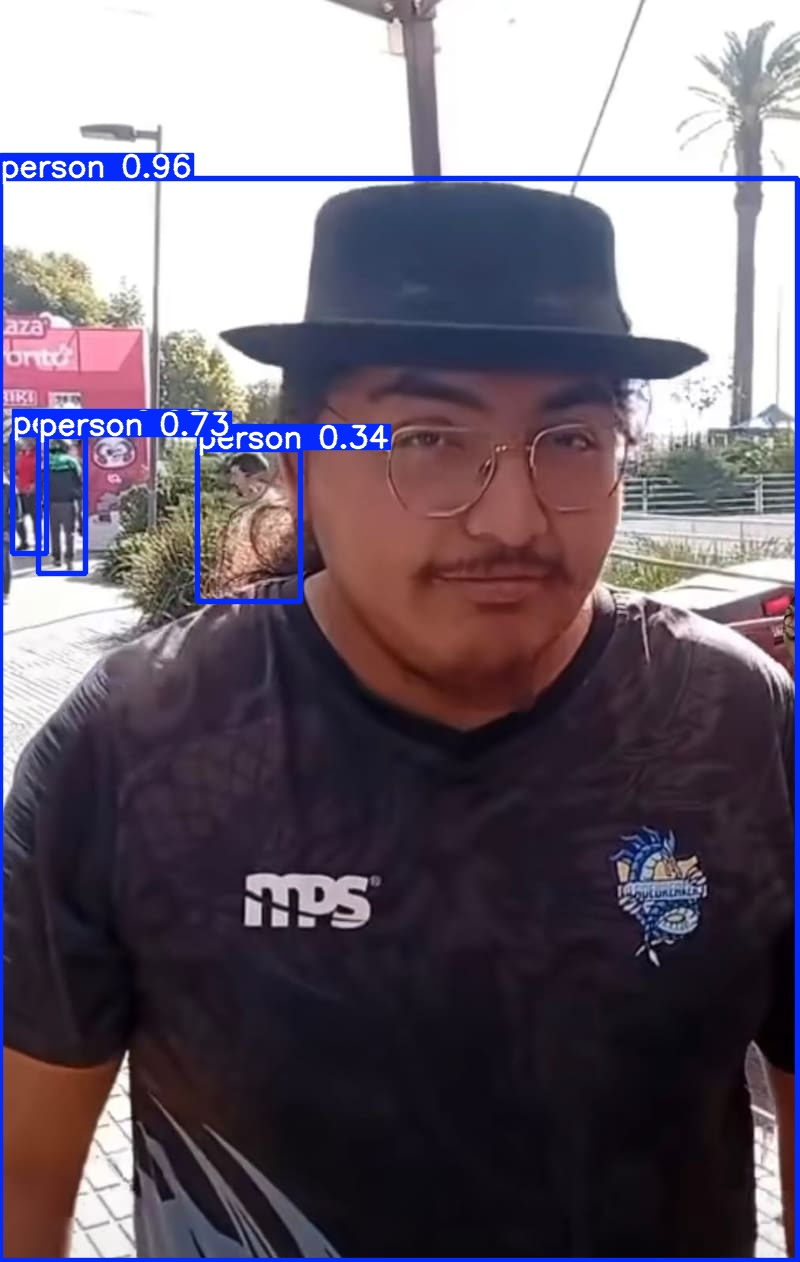

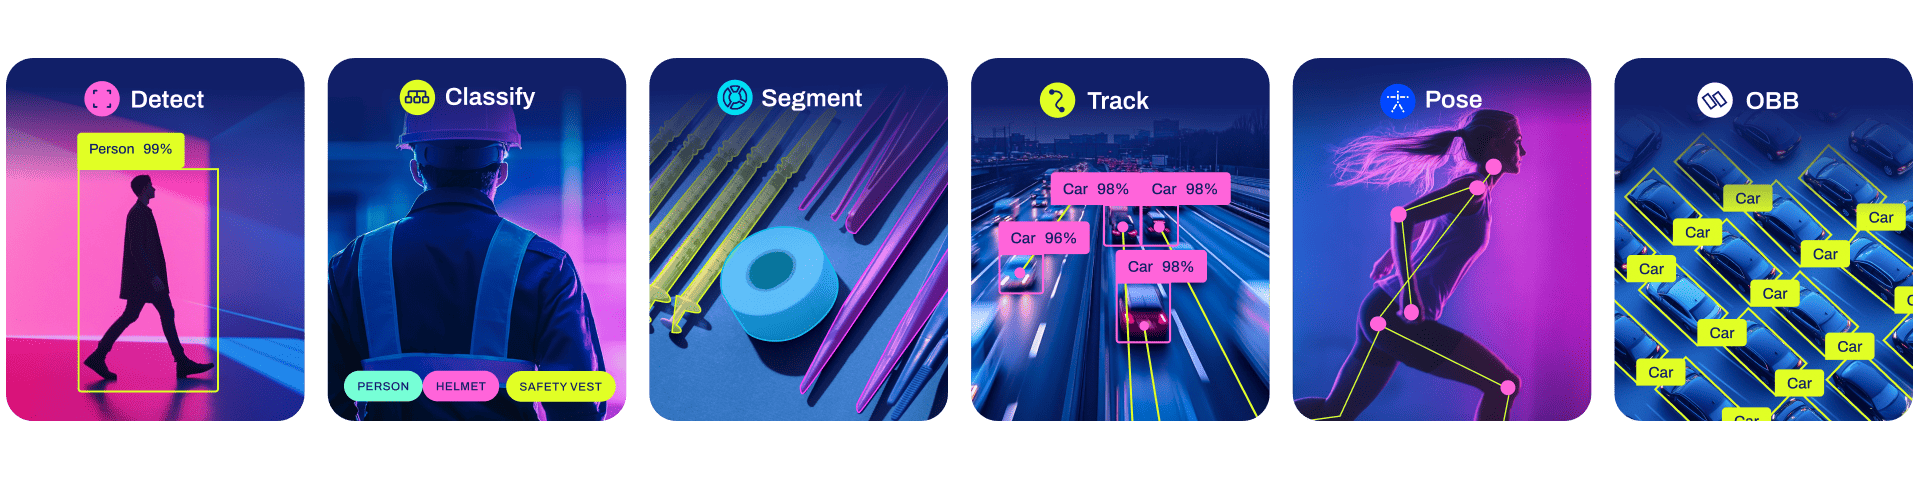